In [57]:
% matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

In [168]:
log_dir = '/home/rbodo/.snntoolbox/data/mnist/cnn/lenet5/keras/log'

log_data = np.load(os.path.join(log_dir, 'gui', '02', 'log_vars', '0.npz'))
mem_n_b_l_t = log_data['mem_n_b_l_t']
spiketrains_n_b_l_t = log_data['spiketrains_n_b_l_t']
input_b_l_t = log_data['input_b_l_t']

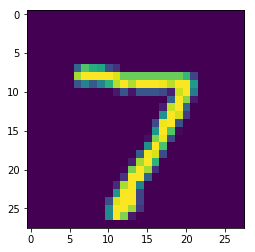

In [60]:
plt.imshow(input_b_l_t[0][0, :, :, 0])

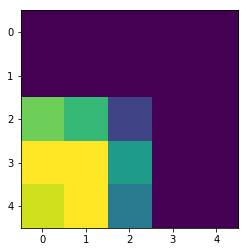

In [61]:
x = input_b_l_t[0][0, 6:11, 19:24, 0]
plt.imshow(x)

In [15]:
weights = np.load(os.path.join(log_dir, 'gui', '02', 'normalization', 'activations', 'weights.npz'))

In [16]:
w = weights['00Conv2D_6x24x24'][:, :, 0, -1]
b = -0.29976115

In [8]:
np.sum(np.dot(x, w)) + b

-0.2822392830527804

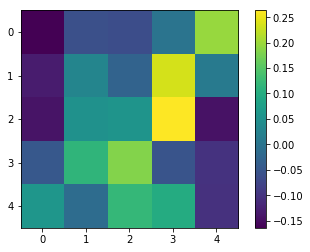

In [17]:
plt.imshow(w)
plt.colorbar()

In [18]:
w

array([[-0.16420041, -0.06052273, -0.06392822,  0.00095498,  0.19786896],
       [-0.13123243,  0.03031245, -0.02820537,  0.23599319,  0.01150374],
       [-0.14161679,  0.05246035,  0.05763206,  0.26350227, -0.14397088],
       [-0.04594194,  0.11536314,  0.18453987, -0.05285797, -0.10232477],
       [ 0.06036865, -0.01354937,  0.12078279,  0.09827674, -0.10254867]], dtype=float32)

In [169]:
sample_num = 0
layer_num = 2
fm_num = 2
row_idx = slice(0, 5)
col_idx = slice(0, 5)
b = 0.001
duration = 50
dt = 0.1
num_timesteps = int(duration / dt)

In [170]:
spiketrains = np.reshape(spiketrains_n_b_l_t[layer_num, 0][sample_num, fm_num, row_idx, col_idx, :], (-1, num_timesteps))
mem = np.reshape(mem_n_b_l_t[layer_num, 0][sample_num, fm_num, row_idx, col_idx, :], (-1, num_timesteps))

(-1, 5)

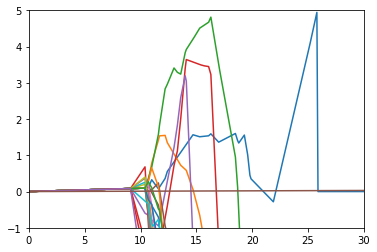

In [167]:
time = np.arange(0, duration, dt)
for m in mem:
    plt.plot(time, m)
plt.plot(time, [t*b for t in time])
plt.xlim(0, 30)
plt.ylim(-1, 5)

(-1, 1)

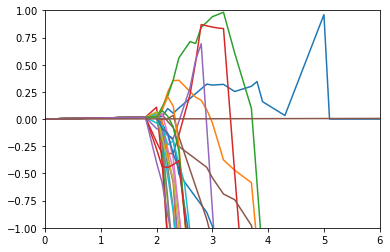

In [172]:
time = np.arange(0, duration, dt)
for m in mem:
    plt.plot(time, m)
plt.plot(time, [t*b for t in time])
plt.xlim(0, 6)
plt.ylim(-1, 1)

(-2, 2)

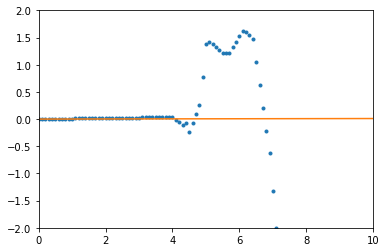

In [149]:
time = np.arange(0, duration, dt)
plt.plot(time, mem[15], '.')
plt.plot(time, [t*b for t in time])
plt.xlim(0, duration/10)
plt.ylim(-2, 2)

(-2, 2)

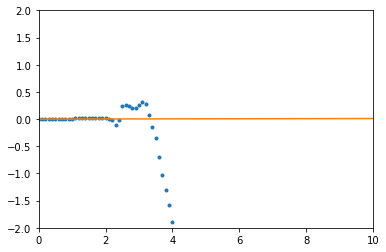

In [155]:
time = np.arange(0, duration, dt)
plt.plot(time, mem[15], '.')
plt.plot(time, [t*b for t in time])
plt.xlim(0, duration/5)
plt.ylim(-2, 2)

In [75]:
spiketrains_pre = np.reshape(spiketrains_n_b_l_t[layer_num - 1, 0][sample_num, :, row_idx, col_idx, :], (-1, duration))

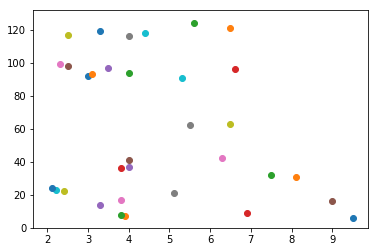

In [107]:
for i, spiketrain in enumerate(spiketrains_pre):
    isi = spiketrain[np.nonzero(spiketrain)]
    if len(isi) == 0:
        continue
    plt.scatter(isi[0], i)